#### About
Breast Cancer Detection using various random forests.
Dataset Link - https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

To predict whether a patient is Benign(B) or Malignant(M)

In [14]:
#importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  plot_confusion_matrix



In [2]:
#exploring the dataset
df = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
np.unique(df.diagnosis.values)

array(['B', 'M'], dtype=object)

In [5]:
#dropping duplicates and nan
print("Length of dataframe before initial cleaning : {}".format(len(df)))
df = df.drop_duplicates()
df = df.dropna()
print("Length of dataframe after initial cleaning : {}".format(len(df)))

Length of dataframe before initial cleaning : 569
Length of dataframe after initial cleaning : 569


In [7]:
#converting labels to categorical columns
df.replace({'diagnosis':{'B':0,'M':1}}, inplace =True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#creating feature and labels
X = df.drop(['diagnosis','id'],axis=1)
y = df.diagnosis

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [11]:
random_forest_classifier = RandomForestClassifier()


In [12]:
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
random_forest_classifier.score(X_test,y_test)

0.9649122807017544

Text(0.5, 23.52222222222222, 'Prediction')

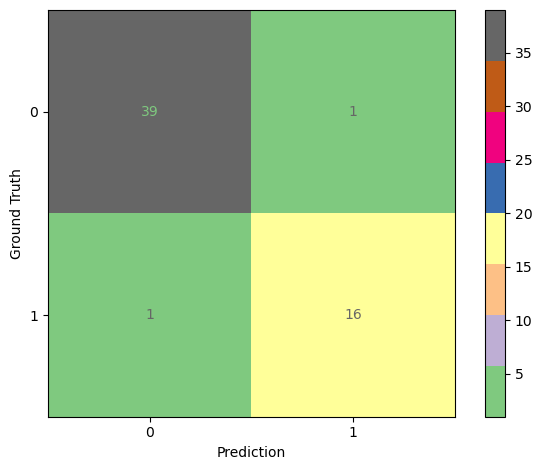

In [18]:
cf = plot_confusion_matrix(random_forest_classifier,X_test,y_test,cmap='Accent')
plt.tight_layout()
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')